Kiet Nguyen

ID: 001601720

Email: kngu179@wgu.edu

#### **I. Introduction**

#### 1. Context

Since its creation in 2009, the value of Bitcoin went from \$0 to an all time high of almost \$69,000 in 2021 (Edwards, 2022). As of September 2022, the price has fallen to just above \$20,000. The extreme volatility of this asset was driven in part due to its status as an emerging investment vehicle. While Bitcoin shared some similarities with other asset classes such as stocks and commodities, its short history meant there was not enough evidence to support this claim. Therefore, an analysis into Bitcoin would help to explain its characteristics in relation to the financial market.

#### 2. Research Question

This analysis aimed to answer the following question: Was the price of Bitcoin affected by macroeconomic factors, such as the dollar strength,
interest rates, inflation, and unemployment?

#### 3. Hypothesis

The null hypothesis was that the price of Bitcoin was not affected by macroeconomic factors. The alternative hypothesis was that macroeconomic factors had an effect on Bitcoin price. This hypothesis was based on the assumption that as an investment vehicle, Bitcoin should be subjected to the same condition of the financial market. A stronger macroeconomic environment would be favorable to the demand of Bitcoin, and vice versa.

H<sub>0</sub>: Bitcoin price is not affected by macroeconomic factors

H<sub>1</sub>: Bitcoin price is affected by macroeconomic factors

#### **II. Data Collection**

#### 1. Datasets

Five datasets were collected from various sources, as detailed in the table below.

|         Dataset         |  Time Range | Format |                                    Source                                   |
|:-----------------------:|:-----------:|:------:|:---------------------------------------------------------------------------:|
|      Bitcoin Prices     | 2014 - 2022 |   CSV  |                https://www.cryptodatadownload.com/data/cexio/               |
|      Dollar Strength    | 2006 - 2022 |   CSV  |                 https://fred.stlouisfed.org/series/RTWEXBGS                 |
|        Inflation        | 1914 - 2022 |  XLSX  | https://www.rateinflation.com/inflation-rate/usa-historical-inflation-rate/ |
|      Interest Rate      | 1954 - 2022 |   CSV  |                 https://fred.stlouisfed.org/series/FEDFUNDS                 |
|       Unemployment      | 2012 - 2022 |  XLSX  |                 https://data.bls.gov/timeseries/LNS14000000                 |

#### 2. Process

The datasets were found by searching through open datasets from government agencies and company websites. The advantage of this data gathering process was that it was simple to execute. The datasets were downloaded directly from the websites. But the disadvantage was that the process was entirely manual. If the analysis needed to be updated with new data, the datasets have to be found and downloaded again.

One of the challenge when collecting inflation data was that data was not in a tabular format and difficult to extract. The Consumer Price Index report contained written price indices for various items, such as food, energy, and shelter. To overcome this problem, the inflation data was taken from a third-party website instead. This website calculated historical inflation rates and published the data in a common format. Other datasets were already in a tabular format for download, which made data preparation on them straightforward.

#### **III. Data Extraction and Preparation**

#### 1. Libraries

The language that will be used to perform the extraction, preparation, and analysis was Python. This language was a commonly used language in data analysis due to its extensive libraries for data science. The advantage of using Python for this analysis was its ease of use. Python syntax could be learned relatively quickly without having to know much about programming (Paul, 2021). The disadvantage of using Python for analytics would be due to its large library. Performing data analytics on Python required learning about many libraries, their functionalities, and what parameters to use.

The following Python libraries were used:

- `numpy`: numeric computation library.
- `pandas`: efficient 1D and 2D data structures, such as Series and DataFrame.
- `matplotlib` and `seaborn`: graphs and figures for data visualizations.
- `statsmodels`: various classes and functions related to statistical models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

from tabulate import tabulate
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR

#### 2. Data Extraction

The datasets were imported into dataframes using `pandas`. Each dataset was assigned to a separate variable.

In [2]:
btc = pd.read_csv('CEX_BTC_USD.csv')
dollar = pd.read_csv('REAL_BROAD_DOLLAR_INDEX.csv')
inflation = pd.read_excel('US_INFLATION_RATES.xlsx')
interest = pd.read_csv('FED_FUND_RATES.csv')
unemployment = pd.read_excel('US_UNEMPLOYMENT_RATES.xlsx')

#### 3. Data Preparation

To preprare the data for analysis, each dataset needed to be cleaned separately. Other datasets were not in the same time range as Bitcoin prices. The time range of Bitcoin prices was from July 2014 to August 2022. Other datasets contained data that went back further than 2014. This meant data older than July 2014 had to be dropped from other datasets to ensure consistency with Bitcoin prices. Bitcoin prices were also converted from daily to monthly to fit with the timeframes of other datasets.

##### a. Bitcoin Prices

In [3]:
# View Bitcoin prices
btc

,https://www.CryptoDataDownload.com,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
1,1661558400,8/27/2022,BTC/USD,20280.1,20389.2,19859.9,20074.1,34.07540398,684033.067
2,1661472000,8/26/2022,BTC/USD,21608.2,21881,20139.1,20280.6,112.8191918,2288040.902
3,1661385600,8/25/2022,BTC/USD,21418.5,21793.1,21367.6,21618.3,16.86206973,364529.282
4,1661299200,8/24/2022,BTC/USD,21538.9,21950.7,21196.5,21418.9,17.31601862,370890.0712
...,...,...,...,...,...,...,...,...,...
2955,1405987200,7/22/2014,BTC/USD,604,611.85,603,609.99,4.95748732,3024.01769
2956,1405900800,7/21/2014,BTC/USD,603.06,613,603,603.15,2.83179863,1707.999344
2957,1405814400,7/20/2014,BTC/USD,603.02,613,603,603.06,5.36491325,3235.364585
2958,1405728000,7/19/2014,BTC/USD,613,617,603,613.96,5.90101612,3622.987857


In [4]:
# Set row 0 as header
btc.columns = btc.iloc[0]
btc = btc[1:]

# Keep only date and close columns
btc = btc[['date', 'close']]

# Conver close column to float type
btc['close'] = btc['close'].astype(float)

# Rename columns
btc.rename(columns={'date': 'Date', 'close': 'Bitcoin Price'}, inplace=True)

# Convert Date column into datetime index
btc.set_index('Date', inplace=True)
btc.index = pd.to_datetime(btc.index)

# Take price on first day of each month
btc = btc.resample('MS').first()

# Remove most recent row to match with other datasets
btc = btc.iloc[:-1]

btc

,Bitcoin Price
Date,
2014-07-01,603.0000
2014-08-01,596.8900
2014-09-01,498.9900
2014-10-01,374.5342
2014-11-01,330.3000
...,...
2022-03-01,44422.2000
2022-04-01,46264.0000
2022-05-01,38489.0000


In [5]:
# Assign Bitcoin begin and end date to variables
begin = '2014-07-01'
end = '2022-07-01'

##### b. Dollar Strength Index

In [6]:
dollar

,DATE,RTWEXBGS
0,2006-01-01,100.0000
1,2006-02-01,100.2651
2,2006-03-01,100.5424
3,2006-04-01,100.0540
4,2006-05-01,97.8681
...,...,...
194,2022-03-01,111.2659
195,2022-04-01,111.8324
196,2022-05-01,114.6075
197,2022-06-01,115.6957


In [7]:
# Rename columns
dollar.rename(columns={'DATE': 'Date', 'RTWEXBGS': 'Dollar Index'}, inplace=True)

# Convert date column into datetime index
dollar.set_index('Date', inplace=True)
dollar.index = pd.to_datetime(dollar.index)

# Slice dataframe from oldest Bitcoin price date
idx = dollar.index.get_loc(begin)
dollar = dollar.iloc[idx:]

dollar

,Dollar Index
Date,
2014-07-01,88.9483
2014-08-01,89.7677
2014-09-01,91.0844
2014-10-01,92.1952
2014-11-01,93.5410
...,...
2022-03-01,111.2659
2022-04-01,111.8324
2022-05-01,114.6075


##### c. Inflation Rate

In [8]:
inflation

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,2022,0.07480,0.07871,0.08542,0.08259,0.08582,0.09060,0.08525,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,0.01400,0.01676,0.02620,0.04160,0.04993,0.05391,0.05365,0.05251,0.05390,0.06222,0.06809,0.07036,0.04698
2,2020,0.02487,0.02335,0.01539,0.00329,0.00118,0.00646,0.00986,0.01310,0.01371,0.01182,0.01175,0.01362,0.01234
3,2019,0.01551,0.01520,0.01863,0.01996,0.01790,0.01648,0.01811,0.01750,0.01711,0.01764,0.02051,0.02285,0.01812
4,2018,0.02071,0.02212,0.02360,0.02463,0.02801,0.02872,0.02950,0.02699,0.02277,0.02522,0.02177,0.01910,0.02443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1918,0.19658,0.17500,0.16667,0.12698,0.13281,0.13077,0.17969,0.18462,0.18045,0.18519,0.20741,0.20438,0.17284
105,1917,0.12500,0.15385,0.14286,0.18868,0.19626,0.20370,0.18519,0.19266,0.19820,0.19469,0.17391,0.18103,0.17841
106,1916,0.02970,0.04000,0.06061,0.06000,0.05941,0.06931,0.06931,0.07921,0.09901,0.10784,0.11650,0.12621,0.07667
107,1915,0.01000,0.01010,0.00000,0.02041,0.02020,0.02020,0.01000,-0.00980,-0.00980,0.00990,0.00980,0.01980,0.00915


In [9]:
# Drop Annual column
inflation.drop(['Annual'], axis=1, inplace=True)

# Convert dataframe from wide to long format
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
inflation = pd.melt(inflation, id_vars=['Year'], value_vars=month, var_name='Month', value_name='Inflation Rate')

# Create a date column using Year and Month columns
inflation['Date'] = pd.to_datetime(inflation['Year'].astype(str) + '-' + inflation['Month'].astype(str))

# Keep only Date and Inflation Rate columns
inflation = inflation[['Date', 'Inflation Rate']]

# Sort dataframe by Date
inflation.sort_values(by='Date', inplace=True)

# Use Date column as index
inflation.set_index('Date', inplace=True)

# Slice dataframe to Bitcoin time range
idx_1 = inflation.index.get_loc(begin)
idx_2 = inflation.index.get_loc(end)
inflation = inflation[idx_1: idx_2 + 1]

inflation

,Inflation Rate
Date,
2014-07-01,0.01992
2014-08-01,0.01700
2014-09-01,0.01658
2014-10-01,0.01664
2014-11-01,0.01322
...,...
2022-03-01,0.08542
2022-04-01,0.08259
2022-05-01,0.08582


##### d. Interest Rate

In [10]:
interest

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
812,2022-03-01,0.20
813,2022-04-01,0.33
814,2022-05-01,0.77
815,2022-06-01,1.21


In [11]:
# Rename columns
interest.rename(columns={'DATE': 'Date', 'FEDFUNDS': 'Interest Rate'}, inplace=True)

# Convert date column into datetime index
interest.set_index('Date', inplace=True)
interest.index = pd.to_datetime(interest.index)

# Slice dataframe to Bitcoin time range
idx = interest.index.get_loc(begin)
interest = interest[idx:]

interest

,Interest Rate
Date,
2014-07-01,0.09
2014-08-01,0.09
2014-09-01,0.09
2014-10-01,0.09
2014-11-01,0.09
...,...
2022-03-01,0.20
2022-04-01,0.33
2022-05-01,0.77


##### e. Unemployment Rate

In [12]:
unemployment

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
1,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
2,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
3,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
4,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
5,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1
6,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
7,2019,4.0,3.8,3.8,3.6,3.6,3.6,3.7,3.7,3.5,3.6,3.6,3.6
8,2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7
9,2021,6.4,6.2,6.0,6.0,5.8,5.9,5.4,5.2,4.7,4.6,4.2,3.9


In [13]:
# Convert dataframe from wide to long format
unemployment = pd.melt(unemployment, id_vars=['Year'], value_vars=month, var_name='Month', value_name='Unemployment Rate')

# Create a date column using Year and Month columns
unemployment['Date'] = pd.to_datetime(unemployment['Year'].astype(str) + '-' + unemployment['Month'].astype(str))

# Keep only Date and unemployment Rate columns
unemployment = unemployment[['Date', 'Unemployment Rate']]

# Sort dataframe by Date
unemployment.sort_values(by='Date', inplace=True)

# Use Date column as index
unemployment.set_index('Date', inplace=True)

# Slice dataframe to Bitcoin time range
idx_1 = unemployment.index.get_loc(begin)
idx_2 = unemployment.index.get_loc(end)
unemployment = unemployment[idx_1: idx_2 + 1]

unemployment

,Unemployment Rate
Date,
2014-07-01,6.2
2014-08-01,6.1
2014-09-01,5.9
2014-10-01,5.7
2014-11-01,5.8
...,...
2022-03-01,3.6
2022-04-01,3.6
2022-05-01,3.6


#### 4. Combine Datasets

After cleaning, the separate datasets will be combined into one dataset for analysis.

In [14]:
df = pd.concat([btc, dollar, inflation, interest, unemployment], axis=1)

df

,Bitcoin Price,Dollar Index,Inflation Rate,Interest Rate,Unemployment Rate
Date,,,,,
2014-07-01,603.0000,88.9483,0.01992,0.09,6.2
2014-08-01,596.8900,89.7677,0.01700,0.09,6.1
2014-09-01,498.9900,91.0844,0.01658,0.09,5.9
2014-10-01,374.5342,92.1952,0.01664,0.09,5.7
2014-11-01,330.3000,93.5410,0.01322,0.09,5.8
...,...,...,...,...,...
2022-03-01,44422.2000,111.2659,0.08542,0.20,3.6
2022-04-01,46264.0000,111.8324,0.08259,0.33,3.6
2022-05-01,38489.0000,114.6075,0.08582,0.77,3.6


#### **IV. Analysis**

#### 1. Exploratory Data Analysis

Before building a model, exploratory data analysis will be performed on the dataset. This preliminary step ensured that the variables could be analyzed before actual modeling. It could also lead to the discovery of patterns, anomalies, and outliers in the dataset.

This process involved the following steps:

1. Check the descriptive statistics.
2. Visualize variables.
3. Determine the correlation between them.

In [15]:
# Show descriptive statistics
df.describe()

,Bitcoin Price,Dollar Index,Inflation Rate,Interest Rate,Unemployment Rate
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,12194.804176,105.113201,0.023894,0.789897,5.023711
std,16614.597223,5.072579,0.022011,0.810827,1.849875
min,226.564900,88.948300,-0.002000,0.050000,3.500000
25%,603.000000,103.085600,0.011750,0.090000,3.800000
50%,6588.600000,105.857300,0.017900,0.380000,4.700000
75%,11293.640000,107.870500,0.024870,1.510000,5.400000
max,60982.700000,118.267400,0.090600,2.420000,14.700000


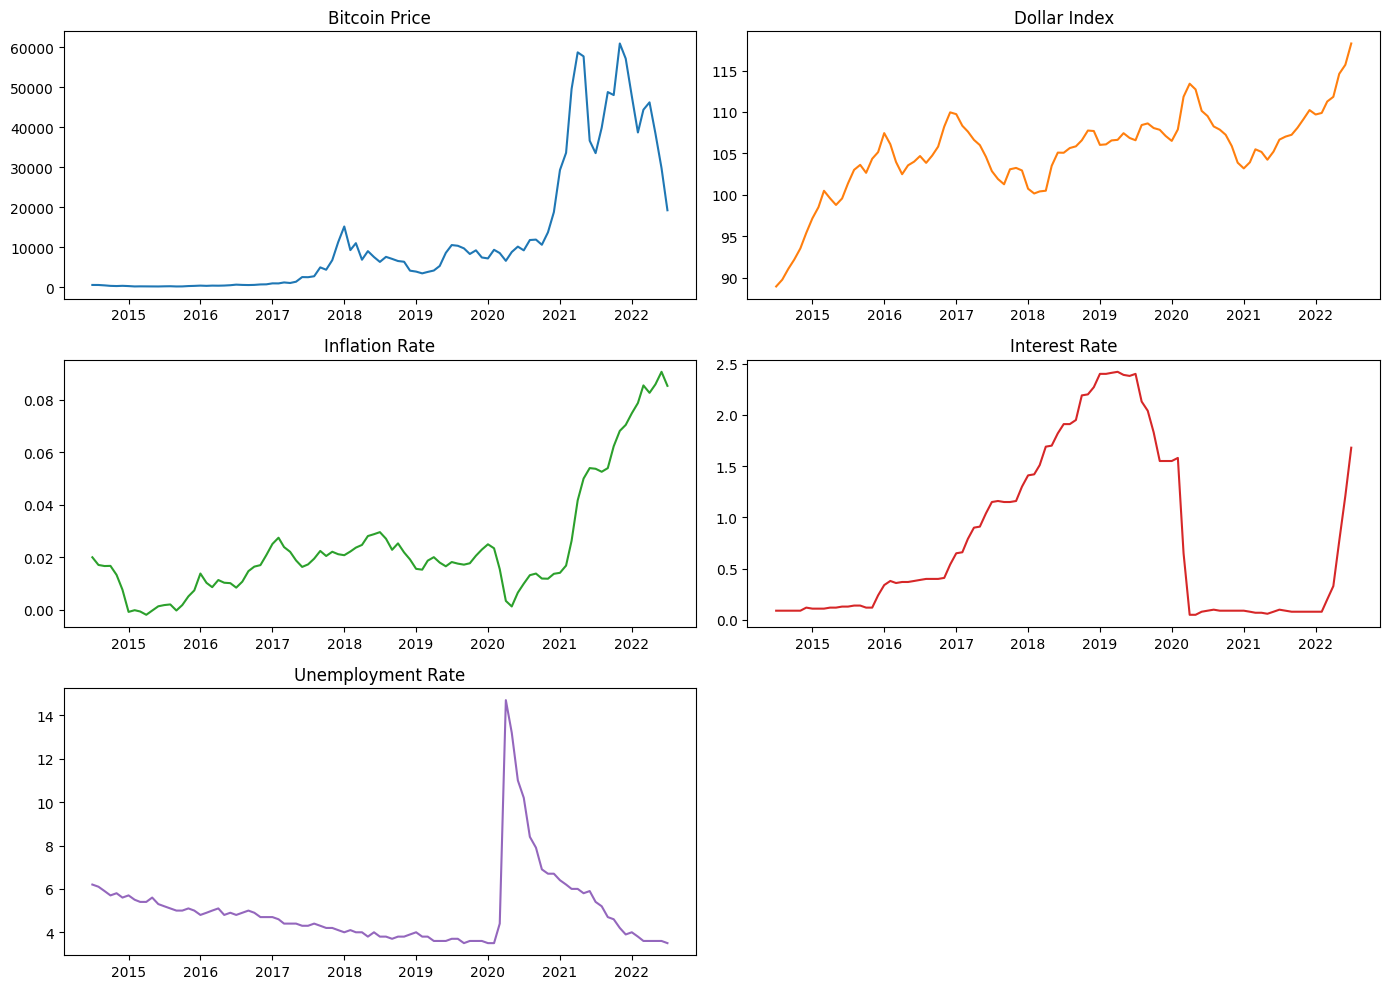

In [16]:
# Color palette
pal = sns.color_palette()

# Create subplots for variables
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

# Counters for subplot positions and color
x = 0
y = 0
color = 0

# Get list of variables
cont = df.columns.tolist()

# Loop and plot
for idx, var in enumerate(cont):
    # Reset counters at limit
    if y == 2:
        x += 1
        y = 0
    
    # Plot time series
    p = sns.lineplot(ax=axes[x, y], data=df[var], color=pal[color])
    p.set(ylabel=None)
    p.set(xlabel=None)
    p.set(title=var)
    
    # Increment counters
    y += 1
    color += 1

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

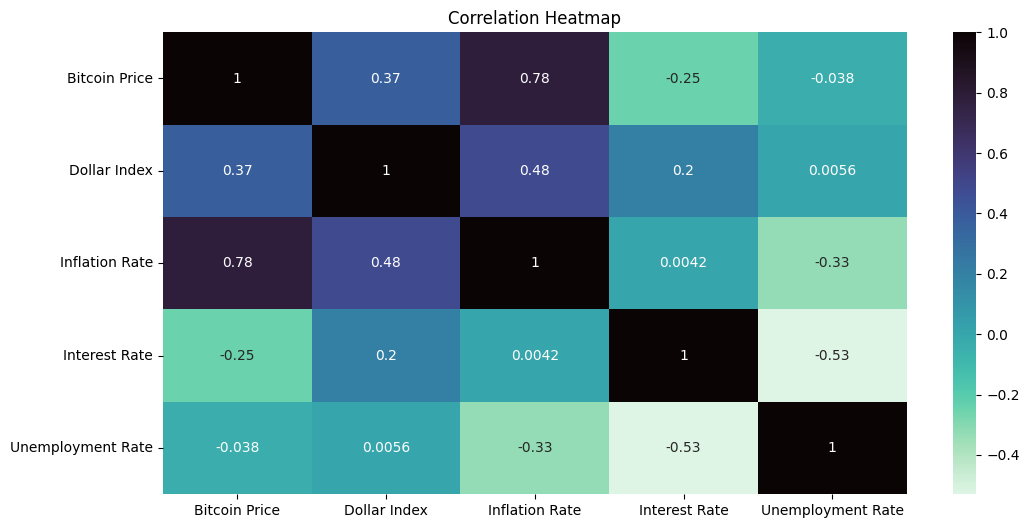

In [17]:
# Plot correlation heatmap
fig = plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='mako_r')
plt.title('Correlation Heatmap')
plt.show()

#### 2. Evaluate Stationarity

For time series analysis to be effective, each time series needed to be stationary. In a stationary time series, the mean, variance, and covariance were constant. This meant that the distribution of the time series remained constant (Singh, 2020). On the other hand, non-stationary time series cannot be  effectively analyzed due to the change in its distribution over time. Most statistical models required the time series to be stationary.

To evaluate stationarity, the Augmented Dicker-Fuller Test was performed on each variable. At a significance level of 0.05, the hypothesis for this test was:

H<sub>0</sub>: time series is not stationary

H<sub>1</sub>: time series is stationary

In [18]:
def stationary_test(df_in, sig=0.05, name=''):
    # Perform ADF test on each variable at significance level 0.05
    result = []
    for name, column in df_in.iteritems():
        res = adfuller(column, autolag='AIC')
        p_value = round(res[1], 3)
        result.append([name, p_value, bool(p_value <= sig)])
        
    # Print table of result
    print(tabulate([res for res in result], headers=['Variable', 'P-Value', 'Stationary']))

stationary_test(df)

Variable             P-Value  Stationary
-----------------  ---------  ------------
Bitcoin Price          0.078  False
Dollar Index           0.377  False
Inflation Rate         0.963  False
Interest Rate          0.534  False
Unemployment Rate      0.028  True


Based on the result of the ADF test, only unemployment rate was stationary. To proceed with the analysis, the time series needed to be differenced.

#### 3. Time Series Differencing

To remove trend and seasonality that made up non-stationarity, differencing needed to be applied to the time series. This method effectively stabilized the mean and variance (Brownlee, 2020a). After differencing, the variables needed to be tested again for stationarity. Additional differencing would be needed if some variables were still non-stationary.

In [19]:
# First differencing
diff_df = df.diff().dropna()

print('First Differencing\n')
stationary_test(diff_df)

First Differencing

Variable             P-Value  Stationary
-----------------  ---------  ------------
Bitcoin Price          0.199  False
Dollar Index           0.002  True
Inflation Rate         0.216  False
Interest Rate          0      True
Unemployment Rate      0      True


In [20]:
# Second differencing
diff_df = diff_df.diff().dropna()

print('Second Differencing\n')
stationary_test(diff_df)

Second Differencing

Variable             P-Value  Stationary
-----------------  ---------  ------------
Bitcoin Price          0      True
Dollar Index           0      True
Inflation Rate         0.011  True
Interest Rate          0      True
Unemployment Rate      0      True


#### 4. Vector Autoregression

Vector Autoregression (VAR) was a time series analysis algorithm that could be used to model multiple time series. The assumption was that these time series have influenced on each other in binary relationships. The advantage of this technique was that it could be used to capture the relationships between multiple variables. The disadvantage was that the model result only provide an estimation, not the true relationships between complex variables (Maitra, 2021).

In [21]:
# Instantiate VAR model
model = VAR(diff_df)

# Run 5 models with different lags
result = []
for i in range(1, 6):
    res = model.fit(i)
    result.append([i, res.aic, res.bic])
    
# Print table of scores
print(tabulate([res for res in result], headers=['Lag Order', 'AIC', 'BIC']))

  Lag Order      AIC      BIC
-----------  -------  -------
          1  2.34949  3.16118
          2  2.19564  3.69342
          3  1.80145  3.99431
          4  1.79071  4.68786
          5  1.94986  5.56069


When running the model with different lag orders, the best model appeared to be lag 1. While it did not have the lowest AIC score, its BIC score was the lowest. Lag 2 had slightly higher AIC score but its BIC score was significantly higher than lag 1. Other models had lower AIC scores but their BIC scores were much larger. Therefore, the appropriate model was lag 1.

In [22]:
# Model fitted with lag order 1
chosen_model = model.fit(1)

chosen_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Sep, 2022
Time:                     11:08:07
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    3.16118
Nobs:                     94.0000    HQIC:                   2.67736
Log likelihood:          -747.327    FPE:                    10.4894
AIC:                      2.34949    Det(Omega_mle):         7.69818
--------------------------------------------------------------------
Results for equation Bitcoin Price
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     -159.949679       522.300698           -0.306           0.759
L1.Bitcoin Price            -0.227687         0.102477           -2.222           0.026
L1.Dollar Index         

#### **V. Summary**

#### 1. Result of Analysis

The regression equation of Bitcoin price based on the VAR model was:

$$
y = -159.95 + (627.31 \cdot Dollar~Index) + (152,505.52 \cdot Inflation~Rate) + (2,829.61 \cdot Interest~Rate) + (354.22 \cdot Unemployment~Rate)
$$

To evaluate whether the variables were statistically signicant, a comparison check needed to be done between the probability and the t-statistic for each variable. The variable was significant if the probability is greater than t-statistic. This was outlined in the table below.

|        Name       | Probability | t-statistic | Significant |
|:-----------------:|:-----------:|:-----------:|:-----------:|
|    Dollar Index   |    0.127    |    1.525    |    False    |
|   Inflation Rate  |    0.324    |    0.986    |    False    |
|   Interest Rate   |    0.474    |    0.715    |    False    |
| Unemployment Rate |    0.311    |    1.013    |    False    |

All of the variables were not statistically significant. This result failed to reject the null hypothesis that Bitcoin was not affected by macroeconomic factors.

#### 2. Limitation

The biggest limitation of this analysis was that the time length of the variables were short. Since Bitcoin was a relatively new asset class, it did not have the same amount of data as the traditional stock market. The time range of other variables were truncated to ensure consistency with the price of Bitcoin. The accuracy of the model could be improved further with additional data.

#### 3. Recommendation

Based on the analysis, the recommendation would be to perform additional analysis on this topic. While this analysis showed that Bitcoin was not affected by macroeconomic factors at this moment, the same could not be said in the future. As Bitcoin grew into a mature asset class, it could become less volatile and started to follow traditional market cycles. By then, running more experiment would uncover additional details about Bitcoin's relationship with the overall economy.

#### 4. Future Directions

One direction for future study would be to use different macroeconomic factors to the analysis. Some good factors include GDP growth, energy consumption, and consumer spending. The result showed that not all of the variables had an effect on Bitcoin, the question then was to find variables that had an effect in future studies. The other study direction would be to analyze the relationships between Bitcoin and other markets. An investment portfolio often consists of multiple asset classes, such as stocks, bonds, and cash. A regression or time series analysis on the impact of other markets on Bitcoin can provide insights into the new asset's characteristics.

#### **VI. References**

CEX Exchange Data. (n.d.). Crypto Data Download. Retrieved September 2, 2022, from https://www.cryptodatadownload.com/data/cexio/

Brownlee, J. (2020a, August 14). How to Difference a Time Series Dataset with Python. Machine Learning Mastery. Retrieved September 4, 2022, from https://machinelearningmastery.com/difference-time-series-dataset-python/

Brownlee, J. (2020b, August 28). Probabilistic Model Selection with AIC, BIC, and MDL. Machine Learning Mastery. Retrieved September 4, 2022, from https://machinelearningmastery.com/probabilistic-model-selection-measures/

Edwards, J. (2022, July 2). Bitcoin’s Price History. Investopedia. Retrieved September 3, 2022, from https://www.investopedia.com/articles/forex/121815/bitcoins-price-history.asp

Labor Force Statistics from the Current Population Survey. (n.d.). Bureau of Labor Statistics Data. Retrieved September 3, 2022, from https://data.bls.gov/timeseries/LNS14000000

Maitra, S. (2021, December 14). Vector Autoregressive for Forecasting Time Series - Towards Data Science. Medium. Retrieved September 7, 2022, from https://towardsdatascience.com/vector-autoregressive-for-forecasting-time-series-a60e6f168c70

Paul, J. (2022, July 9). Why Learn Python for Data Science in 2022? 5 Reasons. Medium. Retrieved September 4, 2022, from https://medium.com/javarevisited/5-reasons-to-learn-python-for-data-science-16a9d4c44d6d

Federal Funds Effective Rate. (2022, September 1). FRED Economic Data. Retrieved September 3, 2022, from https://fred.stlouisfed.org/series/FEDFUNDS

Real Broad Dollar Index. (2022, September 1). FRED Economic Data. Retrieved September 3, 2022, from https://fred.stlouisfed.org/series/RTWEXBGS

Singh, A. (2020, May 24). A Gentle Introduction to Handling a Non-Stationary Time Series in Python. Analytics Vidhya. Retrieved September 7, 2022, from https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

USA Historical Inflation Rates - 1913 to 2022. (n.d.). Inflation Rate and Consumer Price Index. Retrieved September 7, 2022, from https://www.rateinflation.com/inflation-rate/usa-historical-inflation-rate/